# Section 1: Business Understanding

Understanding the business dynamics of Airbnb requires analyzing three key questions. Firstly, businesses need to comprehend how the price of Airbnb accommodations changes over time to inform pricing strategies, revenue optimization, and market positioning. Secondly, exploring the relationship between property type, neighborhood, and price per night helps businesses tailor their offerings, optimize revenue, and make strategic decisions regarding property acquisition. Lastly, understanding the factors that determine superhost eligibility allows businesses to guide hosts, enhance listing quality, attract more guests, and leverage the superhost status for marketing purposes. By addressing these questions, businesses can gain valuable insights into pricing dynamics, customer preferences, and host performance, enabling them to make informed decisions and thrive in the competitive Airbnb marketplace.

#### Question 1: How does price of Airbnb change with time? 

#### Question 2: How are property type and neighborhood related to price per night? 

#### Question 3: What factors determine whether a host will be a superhost or not? 

In [15]:
# import necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

# Section 2: Data Understanding

### Gather Data

In [16]:
# import csv files 
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

Calender: 

- listing_id: A unique identifier for each listing.
- date: The date of availability for the listing.
- available: A flag indicating whether the listing is available on a particular date. It has two possible values: "t" for true (available) or "f" for false (not available).
- price: The price associated with the listing on a specific date. It is represented as a dollar amount.

The dataset contains multiple entries for the same listing, with each entry corresponding to a different date. The "available" column indicates whether the listing is available on a given date, and the "price" column provides the price associated with the listing for that date.

It is worth noting that some entries have missing values (NaN) in the "price" column, which suggests that the price information is not available or not applicable for those specific dates.

In [17]:
# use head.() to check data 
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


This is a pandas DataFrame with 1,393,570 entries and 4 columns (listing_id, date, available, price), where listing_id is an integer, date and available are objects (strings), and price is an object (string) with 934,542 non-null values.

In [18]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


For the listing_id and date columns, there are no null values, as indicated by a value of 0 in the output. This suggests that every entry in the DataFrame has a valid listing ID and date. Similarly, the available column also has no null values, indicating that the availability status (represented by the "t" or "f" values) is specified for each entry. However, the price column has a non-null value count of 934,542 out of the total 1,393,570 entries, resulting in a proportion of approximately 0.32939. 

In [19]:
# check percentage of missing data values 
calendar.isnull().sum()/calendar.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

Listings:
The dataset provides information on Airbnb listings, including various attributes such as the listing ID, URL, scrape ID, last scraped date, name, summary, space, description, experiences offered, neighborhood overview, and more. It also includes data on review scores, licensing information, instant bookability, cancellation policy, guest requirements (profile picture and phone verification), host listing count, and reviews per month. Each row represents a unique listing, with details such as the property type, amenities, location, and host information. This dataset offers valuable insights into the characteristics and features of Airbnb listings, enabling businesses to analyze and understand the factors that contribute to pricing, guest satisfaction, and host performance. It is a Pandas DataFrame with 3818 entries and 92 columns.

In [20]:
# use display.max_columns to take a look at all columns in this dataset 
pd.set_option('display.max_columns', None)
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [21]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

/var/folders/lc/5ptj5wrd1bd0p_gvjmns5fsr0000gn/T/ipykernel_81741/328849585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(listings.corr(),  cmap='coolwarm', annot=True, fmt='.2f')


<Axes: >

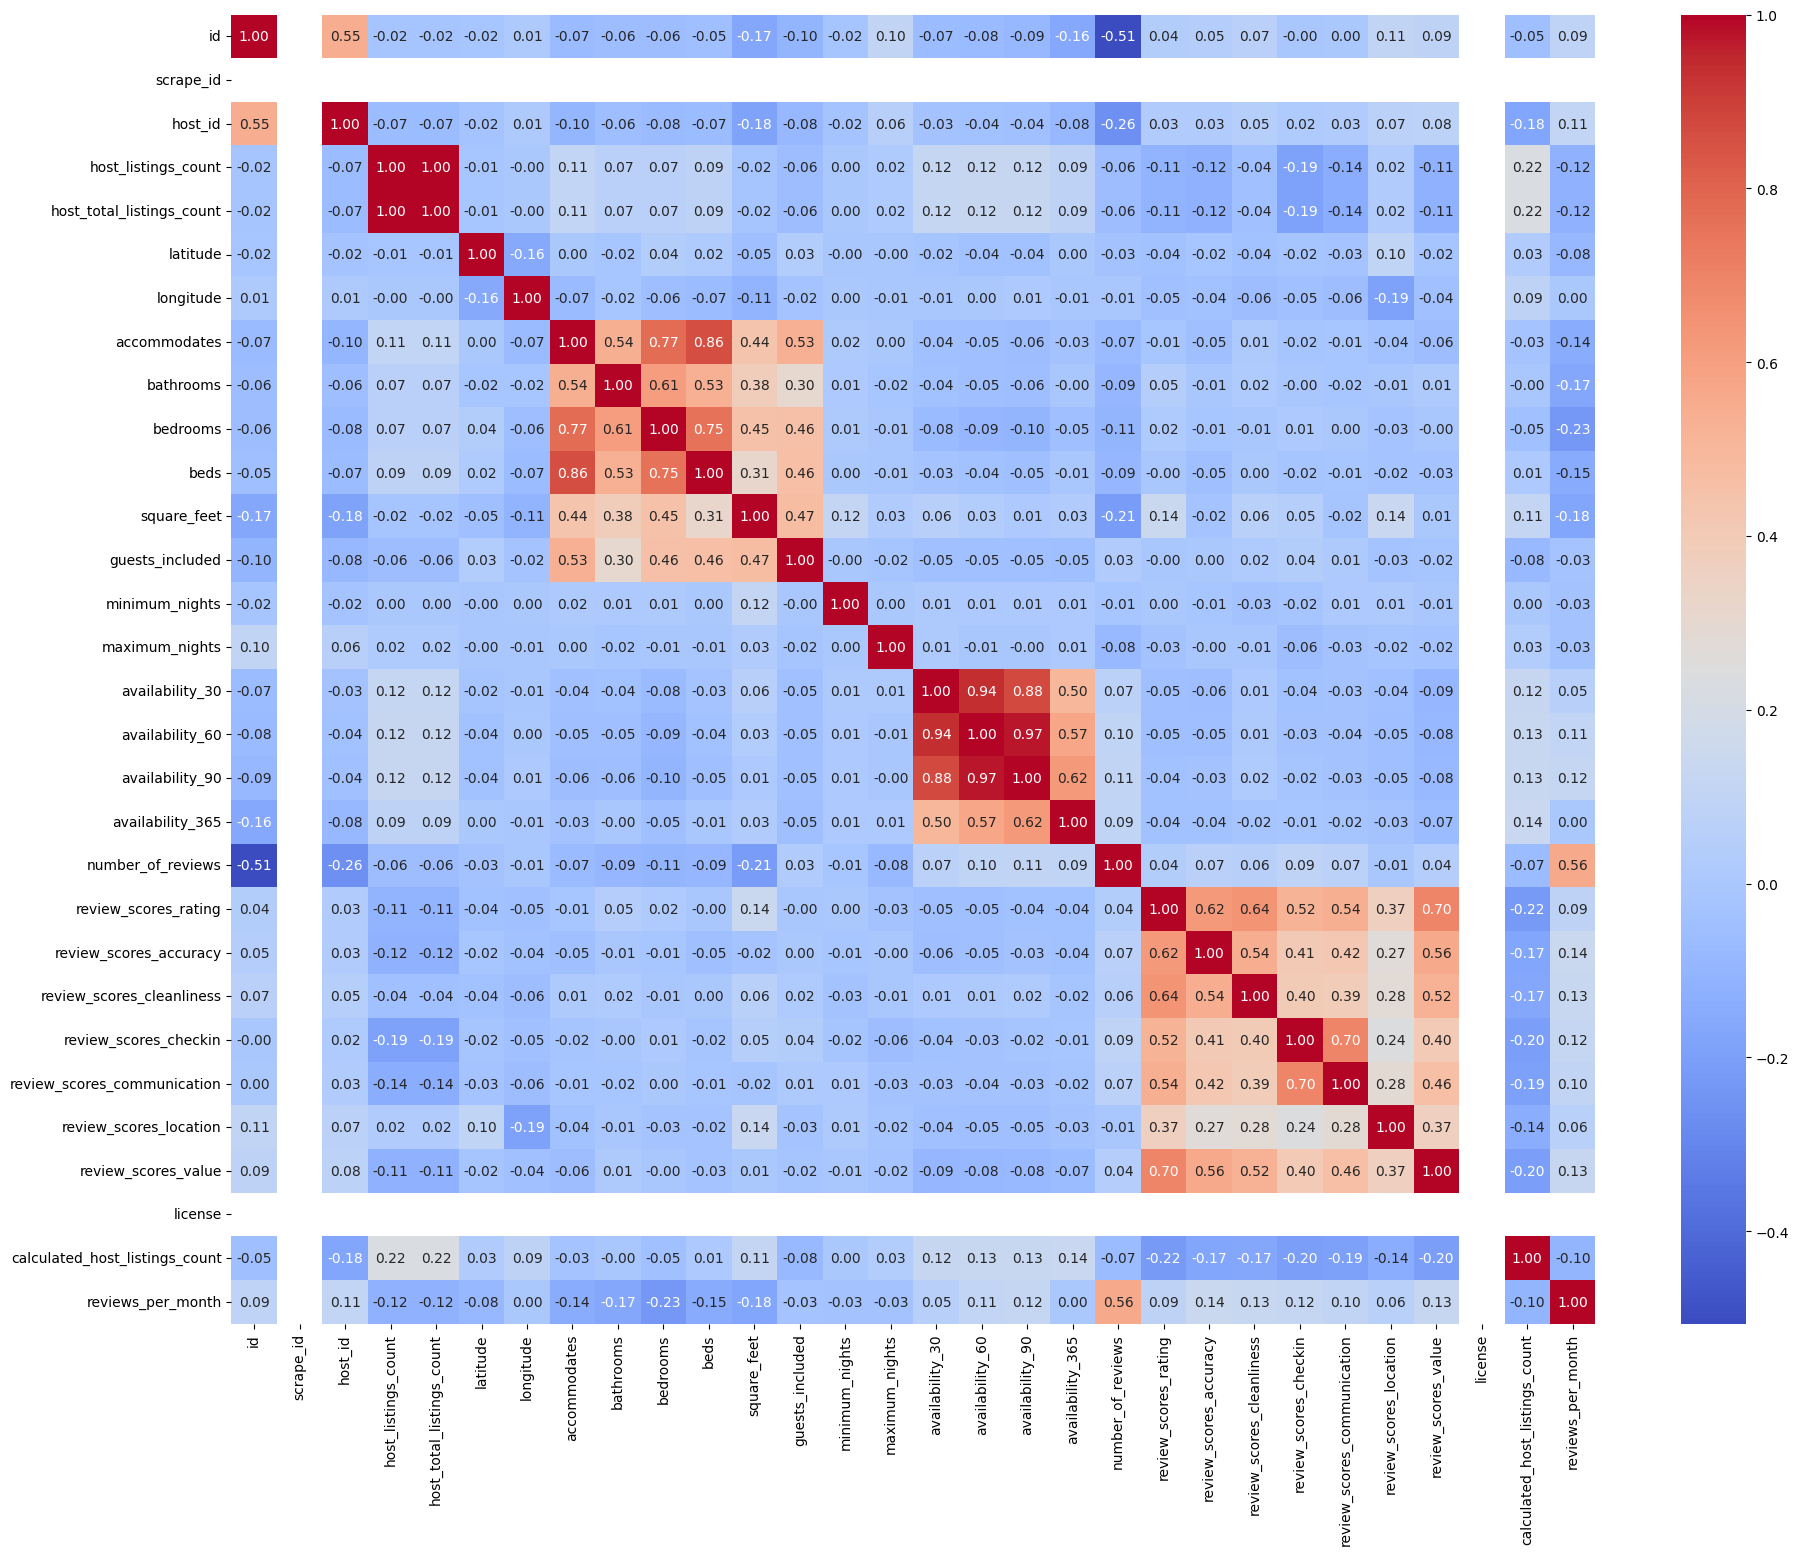

In [22]:
plt.figure(figsize=(22, 17))
sns.heatmap(listings.corr(),  cmap='coolwarm', annot=True, fmt='.2f')

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'scrape_id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'host_listings_count'}>,
        <Axes: title={'center': 'host_total_listings_count'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'guests_included'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>],
       [<Axes: title={'center': 'availability_30'}>,
        <Axes: title={'center': 'availability_60'}>,
        <Axes: title={'center': 'availability_90'}>,
        <Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_revie

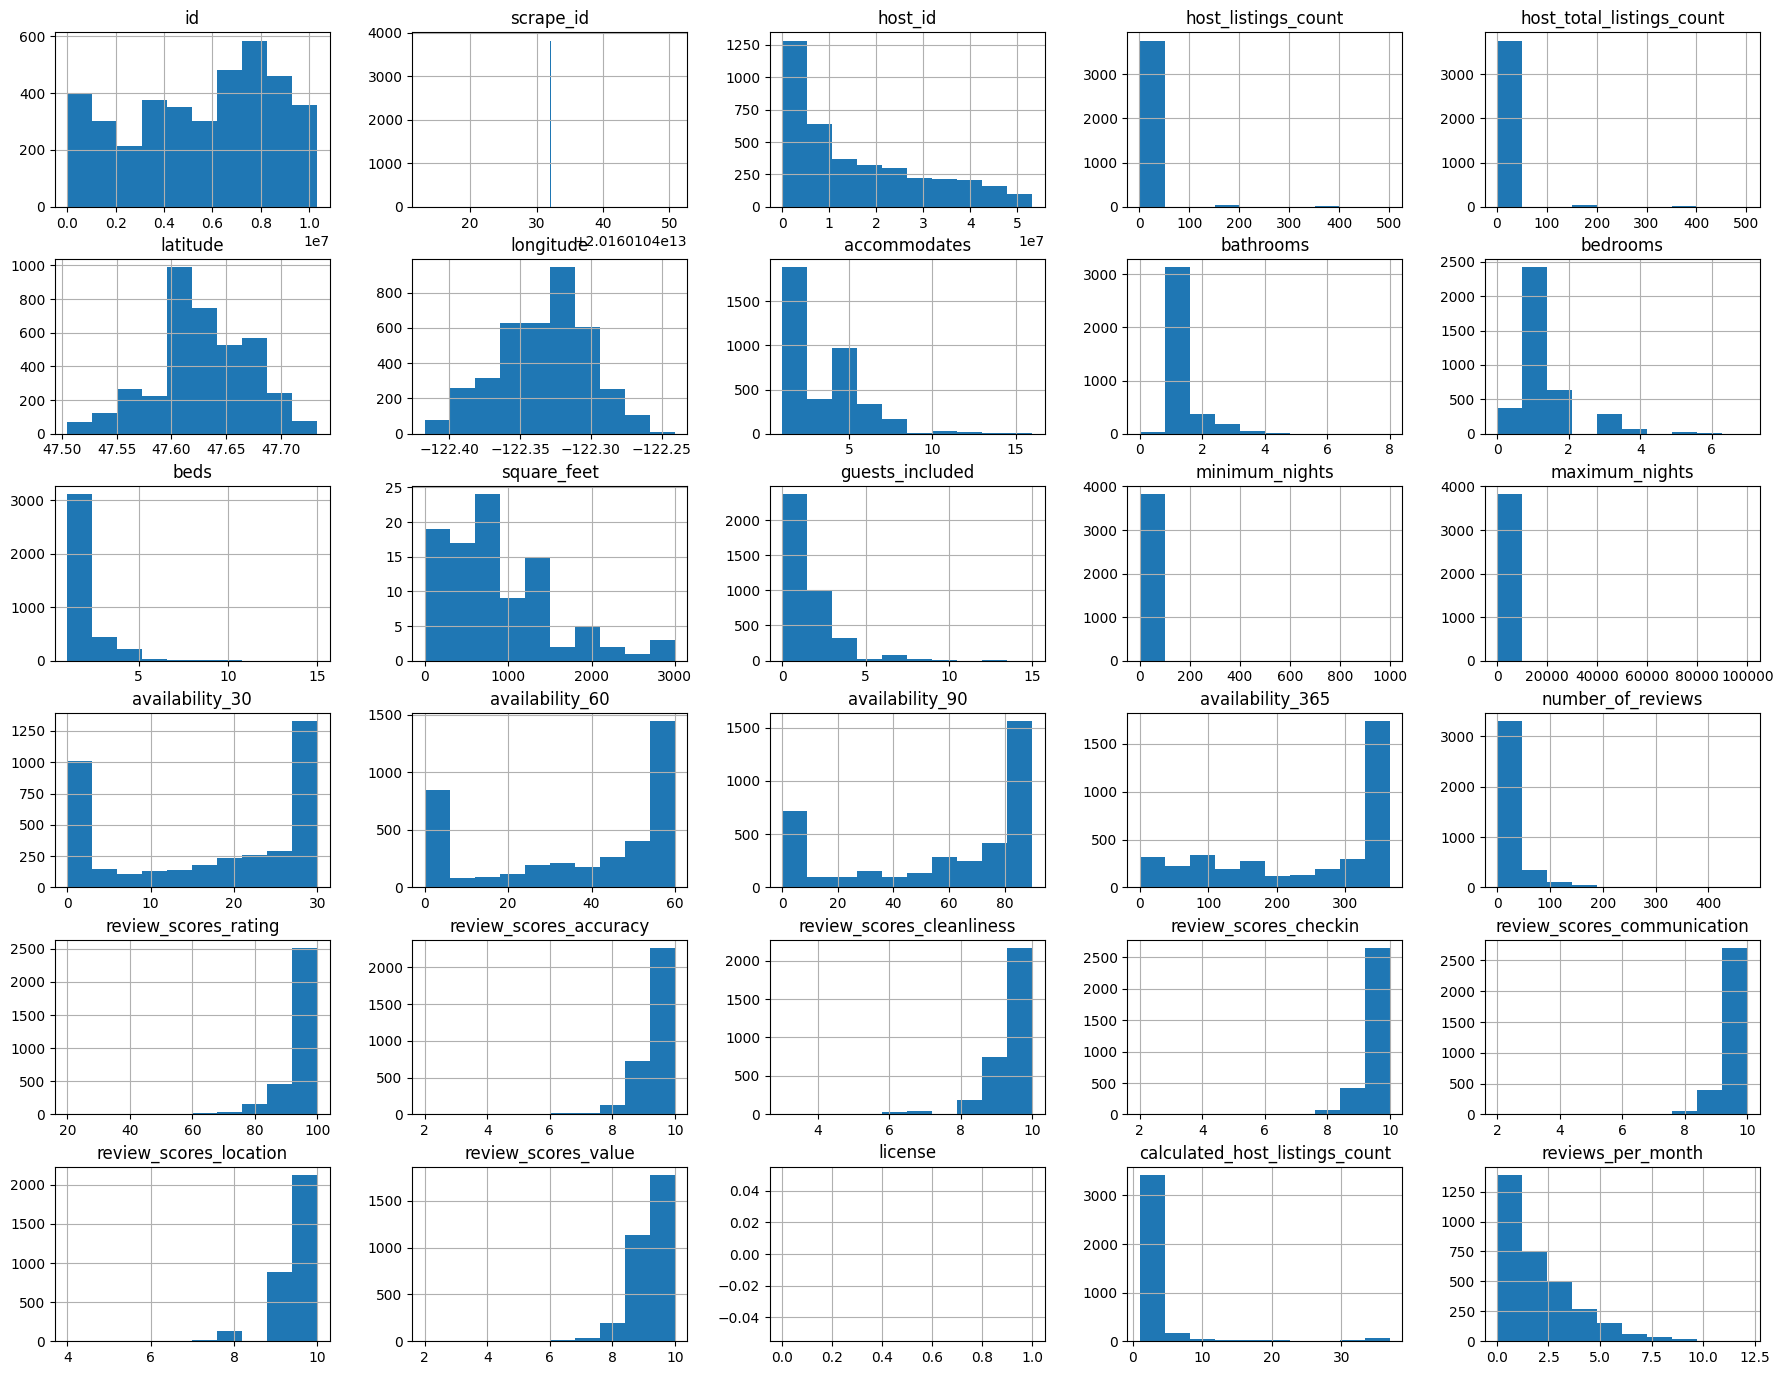

In [23]:
listings.hist(figsize=(22, 17))

In [24]:
(listings.isnull().sum()/listings.shape[0]).sort_values(ascending=False)

license             1.000000
square_feet         0.974594
monthly_price       0.602672
security_deposit    0.511262
weekly_price        0.473808
                      ...   
room_type           0.000000
accommodates        0.000000
bed_type            0.000000
amenities           0.000000
longitude           0.000000
Length: 92, dtype: float64

# Section 3: Data Preparation

#### Calendar

In [25]:
# Around 32.94% of the prices in the dataset are missing or not available. I assume these missing values are random, so I dropped the missing values. 
calendar = calendar.dropna(subset = 'price', axis = 0)
calendar.isnull().sum()

listing_id    0
date          0
available     0
price         0
dtype: int64

In [26]:
# convert date to datetime 
calendar['date'] = pd.DataFrame({'date': pd.to_datetime(calendar['date'])})

In [27]:
# extract year and month from converted date 
calendar['Year'] = calendar['date'].dt.strftime('%Y')
calendar['Month'] = calendar['date'].dt.strftime('%m')

#### Listings

In [28]:
listings['price'] = listings['price'].str.replace('[$,]', '', regex=True)
listings['price'] = pd.to_numeric(listings['price'])

# Section 4: Evaluation

#### Question 1: How does price of Airbnb change with time? 

In [29]:
calendar.head()

,listing_id,date,available,price,Year,Month
0,241032,2016-01-04,t,$85.00,2016,01
1,241032,2016-01-05,t,$85.00,2016,01
9,241032,2016-01-13,t,$85.00,2016,01
10,241032,2016-01-14,t,$85.00,2016,01
14,241032,2016-01-18,t,$85.00,2016,01


In [30]:
# change the data type of price from string to float, replace "$" and ","
calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/lc/5ptj5wrd1bd0p_gvjmns5fsr0000gn/T/ipykernel_81741/3854768665.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',', '').astype(float)


In [31]:
calendar.groupby(["Year"])['price'].mean()

Year
2016    137.951375
2017    136.882590
Name: price, dtype: float64

In [32]:
calendar_2016 = calendar[calendar['Year'] == '2016']

In [37]:
def calendar_barplot(column_name1, column_name2):
    '''
    This function provides the line plot for columns we are intereted in 
    
    Input:
    column_name1, column_name2 (string)

    Output:
    a line plot of interested variables (graph)
    '''
    Monthly_price_change = calendar_2016.groupby([column_name1])[column_name2].mean()
    Monthly_price_change = Monthly_price_change.to_frame()
    sns.lineplot(data = Monthly_price_change, x = column_name1, y=column_name2)


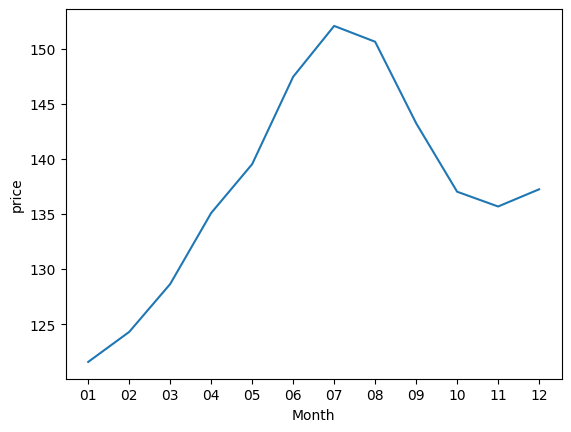

In [38]:
calendar_barplot('Month', 'price')

Findings: The analysis reveals a noteworthy relationship between prices and the time of year, highlighting seasonal fluctuations in Airbnb prices in Seattle. Notably, the prices reach their peak during the summer months, specifically in June and July. This pattern aligns with the city's vibrant tourism season, characterized by increased demand, leading to price increases. By recognizing these seasonal trends, both hosts and guests can effectively plan and manage their expectations.

#### Question 2: How are property type and neighborhood related to price per night? 

In [22]:
listings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [23]:
listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [27]:
mean_price_by_type_neighbourhood = listings['price'].groupby([listings['property_type'], listings['neighbourhood_group_cleansed']]).mean()

In [28]:
mean_price_by_type_neighbourhood

property_type  neighbourhood_group_cleansed
Apartment      Ballard                         108.066667
               Beacon Hill                      84.608696
               Capitol Hill                    119.176966
               Cascade                         123.808824
               Central Area                    103.235294
                                                  ...    
Townhouse      West Seattle                    147.222222
Treehouse      Capitol Hill                    200.000000
               Rainier Valley                   48.000000
               West Seattle                     55.000000
Yurt           West Seattle                    100.000000
Name: price, Length: 131, dtype: float64

In [35]:
import plotly.express as px

# Reshape the mean_price_by_type_neighbourhood data into a pivot table
pivot_table = mean_price_by_type_neighbourhood.unstack()

# Create an interactive heatmap plot with Plotly
fig = px.imshow(pivot_table,
                labels=dict(x='Neighbourhood Group', y='Property Type', color='Mean Price'),
                x=pivot_table.columns,
                y=pivot_table.index,
                color_continuous_scale='YlGnBu')

# Configure the layout
fig.update_layout(
    title='Mean Price by Property Type and Neighbourhood',
    xaxis=dict(title='Neighbourhood Group'),
    yaxis=dict(title='Property Type'),
    coloraxis_colorbar=dict(title='Mean Price')
)

# Show the plot
fig.show()


#### Question 3: What factors determine whether a host will be a superhost or not? 

To predict whether a host will be a superhost or not, I have selected the following factors: 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'availability_365', 'availability_90', 'availability_60', 'availability_30', and 'review_scores_communication'. These factors encompass key aspects such as superhost status, host experience, communication efficiency, booking availability, and guest ratings. By analyzing these variables, we can gain insights into the likelihood of a host achieving superhost status based on their profile and performance within the Airbnb platform.

In [417]:
superhost_listings = listings[['host_is_superhost', 'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'availability_365', 'availability_90', 'availability_60', 'availability_30', 'review_scores_communication']]

In [419]:
superhost_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            3816 non-null   object 
 1   host_since                   3816 non-null   object 
 2   host_response_time           3295 non-null   object 
 3   host_response_rate           3295 non-null   object 
 4   host_acceptance_rate         3045 non-null   object 
 5   host_total_listings_count    3816 non-null   float64
 6   availability_365             3818 non-null   int64  
 7   availability_90              3818 non-null   int64  
 8   availability_60              3818 non-null   int64  
 9   availability_30              3818 non-null   int64  
 10  review_scores_communication  3167 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 328.2+ KB


In [ ]:
# convert host_response_rate data type from object to float 
superhost_listings['host_response_rate'] = superhost_listings['host_response_rate'].str.rstrip('%').astype(float)
# convert host_acceptance_rate data type from object to float 
superhost_listings['host_acceptance_rate'] = superhost_listings['host_acceptance_rate'].str.rstrip('%').astype(float) 
# convert host_since data type from object to datetime 
superhost_listings['host_since'] = pd.DataFrame({'date': pd.to_datetime(superhost_listings['host_since'])}) 

In [421]:
(superhost_listings.isnull().sum()/superhost_listings.shape[0]*100).sort_values(ascending=False)

host_acceptance_rate           20.246202
review_scores_communication    17.050812
host_response_time             13.698271
host_response_rate             13.698271
host_is_superhost               0.052383
host_since                      0.052383
host_total_listings_count       0.052383
availability_365                0.000000
availability_90                 0.000000
availability_60                 0.000000
availability_30                 0.000000
dtype: float64

In [422]:
# no response rate, no response time, so missing values in host_response_time and in host_response_rate are the same ones , so I am simply dropping off the missing values 
superhost_listings.dropna(subset= ['host_response_time'], axis = 0, inplace = True)

/var/folders/lc/5ptj5wrd1bd0p_gvjmns5fsr0000gn/T/ipykernel_74243/897631603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhost_listings.dropna(subset= ['host_response_time'], axis = 0, inplace = True)


In [424]:
# Fill missing values with mean for host acceptance rate and the methodology here is imputation
mean_acceptance_rate = superhost_listings['host_acceptance_rate'].mean()  
superhost_listings['host_acceptance_rate'].fillna(f"{mean_acceptance_rate:.1f}", inplace=True)  # Fill missing values with mean

/var/folders/lc/5ptj5wrd1bd0p_gvjmns5fsr0000gn/T/ipykernel_74243/640394495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhost_listings['host_acceptance_rate'].fillna(f"{mean_acceptance_rate:.1f}", inplace=True)  # Fill missing values with mean


In [425]:
# Fill missing values with mean for host acceptance rate and the methodology here is imputation
superhost_listings['review_scores_communication'].fillna(superhost_listings['review_scores_communication'].mean(), inplace=True)

/var/folders/lc/5ptj5wrd1bd0p_gvjmns5fsr0000gn/T/ipykernel_74243/441631880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhost_listings['review_scores_communication'].fillna(superhost_listings['review_scores_communication'].mean(), inplace=True)


In [426]:
superhost_listings['host_since_year'] = superhost_listings['host_since'].dt.strftime('%Y')
superhost_listings['host_since_year'] = superhost_listings['host_since_year'].astype(int)

/var/folders/lc/5ptj5wrd1bd0p_gvjmns5fsr0000gn/T/ipykernel_74243/4173167304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhost_listings['host_since_year'] = superhost_listings['host_since'].dt.strftime('%Y')
/var/folders/lc/5ptj5wrd1bd0p_gvjmns5fsr0000gn/T/ipykernel_74243/4173167304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhost_listings['host_since_year'] = superhost_listings['host_since_year'].astype(int)


In [427]:
superhost_listings['total_host_years'] = 2016 - superhost_listings['host_since_year']

/var/folders/lc/5ptj5wrd1bd0p_gvjmns5fsr0000gn/T/ipykernel_74243/2588583495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhost_listings['total_host_years'] = 2016 - superhost_listings['host_since_year']


In [428]:
superhost_listings.drop('host_since', axis = 1, inplace = True)

/var/folders/lc/5ptj5wrd1bd0p_gvjmns5fsr0000gn/T/ipykernel_74243/2747414239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhost_listings.drop('host_since', axis = 1, inplace = True)


Here I need to convert the target variable to 0 or 1. This is the preparation of binomial logistics regression model. 

In [429]:
dummy_superhost = pd.get_dummies(superhost_listings['host_is_superhost'], prefix='superhost', drop_first= True, )
df_with_dummies = pd.concat([superhost_listings, dummy_superhost], axis=1)
df_with_dummies.drop(['host_is_superhost'], axis = 1, inplace=True)

In [430]:
df_with_dummies

,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,availability_365,availability_90,availability_60,availability_30,review_scores_communication,host_since_year,total_host_years,superhost_t
0,within a few hours,96.0,100.0,3.0,346,71,41,14,10.000000,2011,5,0
1,within an hour,98.0,100.0,6.0,291,16,13,13,10.000000,2013,3,1
2,within a few hours,67.0,100.0,2.0,220,17,6,1,10.000000,2014,2,0
4,within an hour,100.0,100.0,2.0,365,90,60,30,10.000000,2011,5,0
6,within an hour,100.0,100.0,1.0,346,71,49,20,10.000000,2012,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3812,within an hour,100.0,100.0,3.0,287,43,30,11,10.000000,2012,4,1
3813,within a few hours,99.0,100.0,354.0,32,32,32,18,8.000000,2015,1,0
3814,within an hour,100.0,100.0,1.0,273,44,26,6,10.000000,2015,1,0
3816,within an hour,100.0,100.0,1.0,179,90,60,30,9.804759,2015,1,0


In [432]:
df_with_dummies['host_acceptance_rate'].astype(float)

0       100.0
1       100.0
2       100.0
4       100.0
6       100.0
        ...  
3812    100.0
3813    100.0
3814    100.0
3816    100.0
3817    100.0
Name: host_acceptance_rate, Length: 3295, dtype: float64

In [433]:
encoder = OrdinalEncoder()
host_response_time_encoded = encoder.fit_transform(df_with_dummies[['host_response_time']])

In [434]:
df_with_dummies['host_response_time'] = host_response_time_encoded

In [435]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3817
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           3295 non-null   float64
 1   host_response_rate           3295 non-null   float64
 2   host_acceptance_rate         3295 non-null   object 
 3   host_total_listings_count    3295 non-null   float64
 4   availability_365             3295 non-null   int64  
 5   availability_90              3295 non-null   int64  
 6   availability_60              3295 non-null   int64  
 7   availability_30              3295 non-null   int64  
 8   review_scores_communication  3295 non-null   float64
 9   host_since_year              3295 non-null   int64  
 10  total_host_years             3295 non-null   int64  
 11  superhost_t                  3295 non-null   uint8  
dtypes: float64(4), int64(6), object(1), uint8(1)
memory usage: 312.1+ KB


In [436]:
X = df_with_dummies.drop('superhost_t', axis=1)
y = df_with_dummies['superhost_t']

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [438]:
# Create a logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)


/Users/fuchunyang/Library/Python/3.11/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [439]:
# Make predictions on the testing set
y_pred = logreg.predict(X_test)

In [440]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7678300455235205


In [442]:
mean_squared_error(y_pred, y_test)

0.2321699544764795

Findings: The mean squared error (MSE) of 0.2321699544764795 indicates the average squared difference between the predicted values and the actual values in your machine learning model. A lower MSE suggests that the model's predictions are closer to the true values. In this case, the MSE of 0.2321699544764795 indicates that, on average, the model's predictions deviate from the actual values by approximately 0.48 (square root of MSE).

Regarding the accuracy of 76.78%, it signifies the proportion of correct predictions made by the model compared to the total number of predictions. While accuracy is a useful metric, it may not provide a complete picture when the classes are imbalanced or when false positives and false negatives have different consequences. Therefore, it is essential to consider other evaluation metrics, such as precision, recall, or F1-score, depending on the specific requirements of your model and the associated business or research context.

In summary, with an MSE of 0.2321699544764795, the model's predictions have an average squared difference from the actual values. The accuracy of 76.78% indicates the proportion of correct predictions, but further evaluation using additional metrics is recommended to fully assess the model's performance.